In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("AppleStore.csv")

<bv>

# matplotlib

<bv>

### 10 most expensive apps

C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12452 missing from c

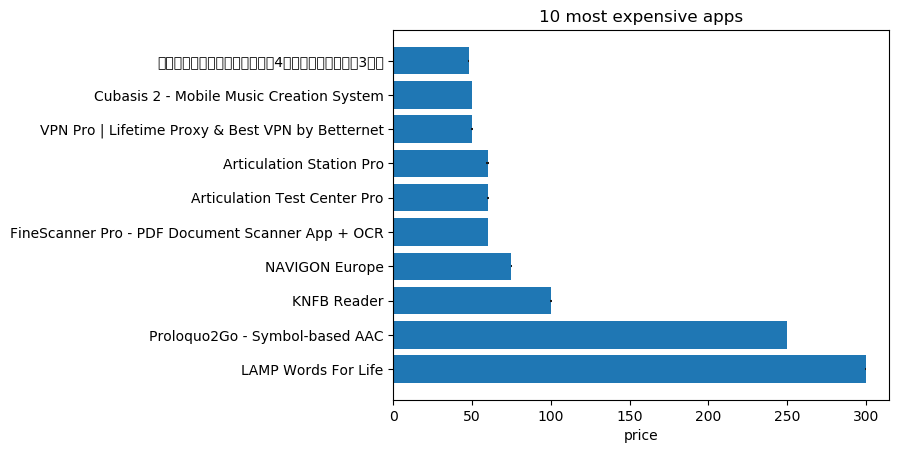

In [4]:
df1 = df.sort_values('price').copy()

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = df1['track_name'][-10:]
y_pos = np.arange(len(people))
performance = df1['price'][-10:]
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('price')
ax.set_title('10 most expensive apps')

plt.show()

### top 15 apps(by download counts)

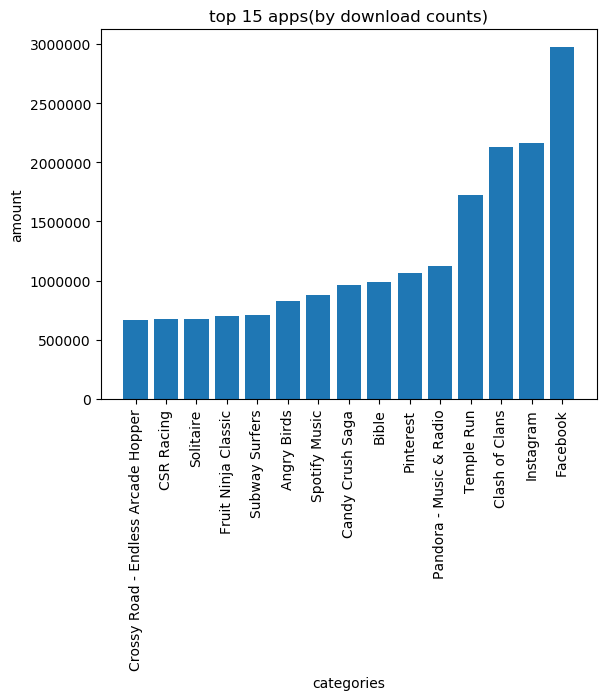

In [24]:
df1 = df.sort_values('rating_count_tot').copy()
height = df1['rating_count_tot'][-15:]
bars = df1['track_name'][-15:]
y_pos =  np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=90)
plt.title("top 15 apps(by download counts)")
plt.xlabel('categories')
plt.ylabel('amount')
plt.show()

### top 20 apps(by rating)

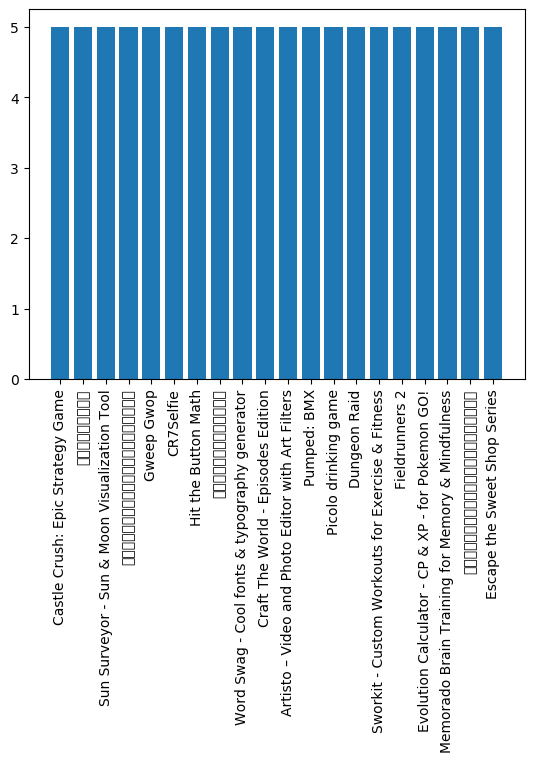

In [29]:
df1 = df.sort_values('user_rating').copy()
height = df1['user_rating'][-20:]
bars = df1['track_name'][-20:]
y_pos =  np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=90)
plt.show()

### amount of ratings in each ratig

(array([ 929.,    0.,   44.,   56.,  106.,  196.,  383.,  702., 1626.,
        3155.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

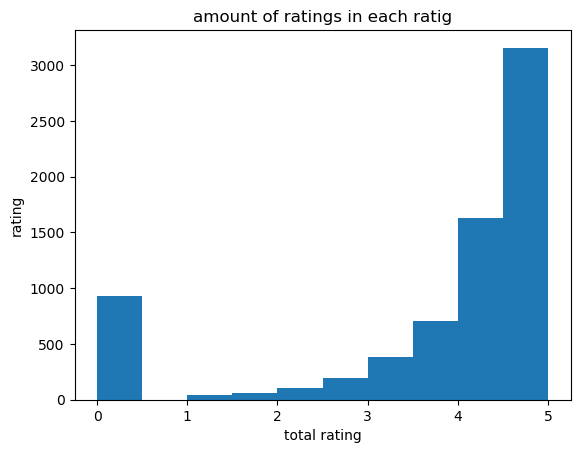

In [32]:
# Generate a normal distribution, center at x=0 and y=5
x = df["user_rating"]
fig, axs = plt.subplots()
axs.set_xlabel('total rating')
axs.set_ylabel('rating')
axs.set_title('amount of ratings in each ratig')
axs.hist(x)

### the amount of apps in each category

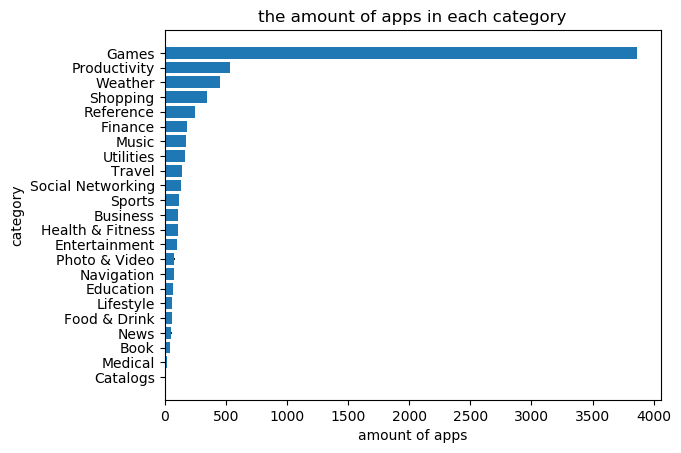

In [33]:
df1 = df.copy()

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = df1['prime_genre'].unique()
y_pos = np.arange(len(people))
performance = df1['prime_genre'].value_counts()
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount of apps')
ax.set_ylabel('category')
ax.set_title('the amount of apps in each category')

plt.show()

### amount of apps in every category(in percentage)

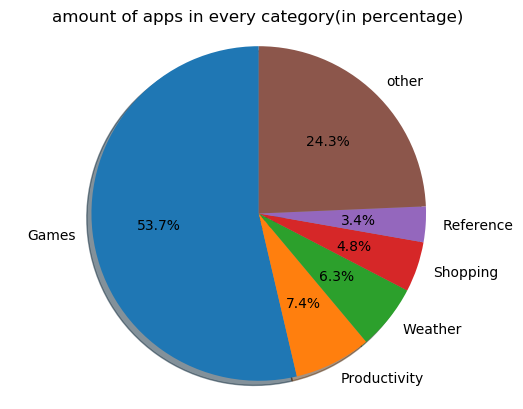

In [34]:
labels = df['prime_genre'].unique()[:5]
labels = np.append(labels, ["other"])
sizes = df['prime_genre'].value_counts()[:5]
sizes = np.append(sizes, [df['prime_genre'].value_counts()[5:].sum()])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('amount of apps in every category(in percentage)')
plt.show()

<bv>

# seaborn

<bv>

### amount of ratings in the total rating

Text(0.5, 1, 'amount of ratings in the total rating')

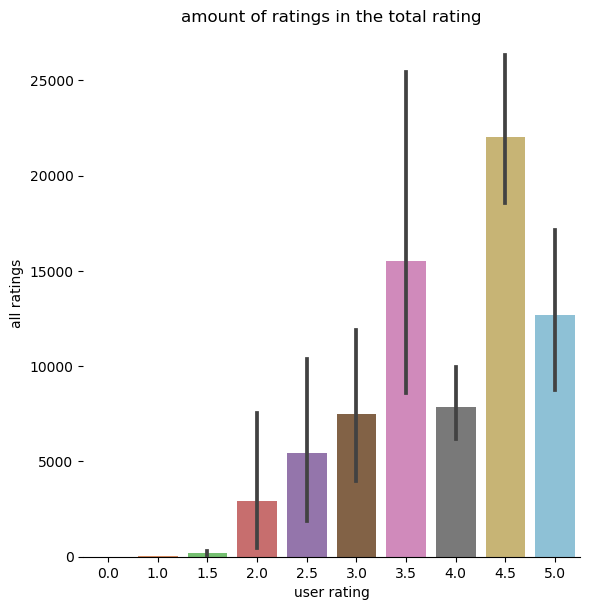

In [41]:
# Load the example Titanic dataset

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="user_rating", y="rating_count_tot",  data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("all ratings")
g.set_xlabels("user rating")
plt.title('amount of ratings in the total rating')

### how many languages free and not free apps have in each category

Text(0.5, 1.0, 'how many languages free and not free apps have in each category')

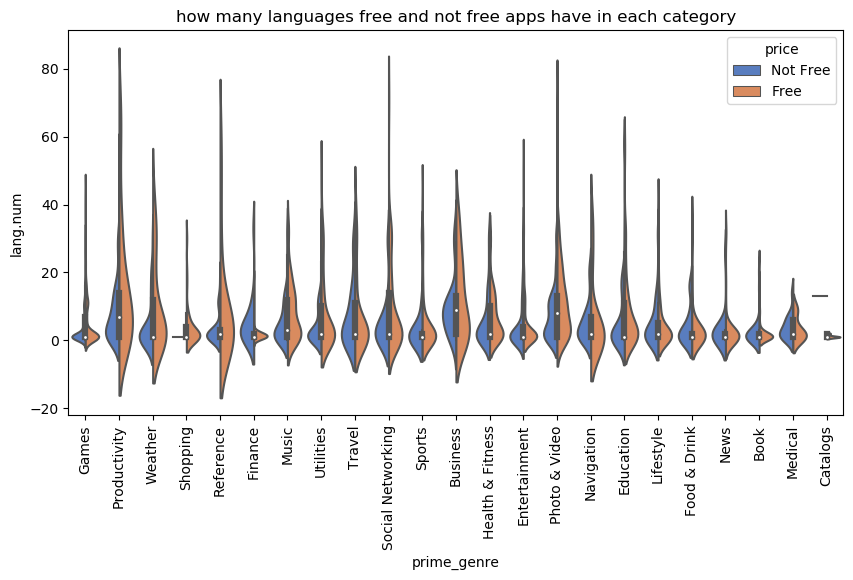

In [48]:
df1 = df.copy()
df1['price'] = df1.price.astype(bool)
df1['price'] = df1.price.astype(str)
df1['price'] = df1.price.replace('False','Free')
df1['price'] = df1.price.replace('True','Not Free')
plt.figure(figsize=(10,5))
chart = sns.violinplot(x='prime_genre', y ='lang.num' ,data=df1, scale='width', hue='price', split=True, palette='muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('how many languages free and not free apps have in each category')

### the mean rating in each category

Text(0.5, 1.0, 'the mean rating in each category')

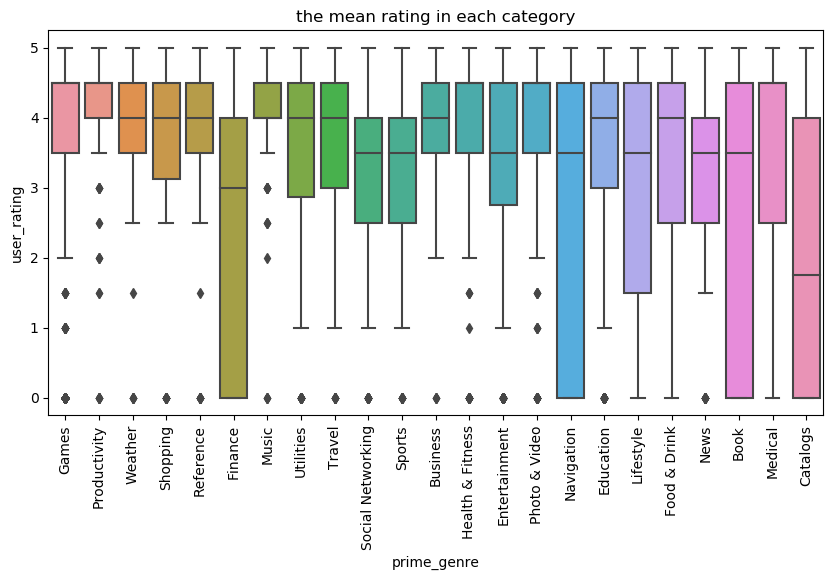

In [49]:
plt.figure(figsize=(10,5))
chart = sns.boxplot(x='prime_genre', y ='user_rating' ,data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("the mean rating in each category")

### pairplot

In [13]:
fig = plt.figure()

dfTmp = df[df["prime_genre"] == "Games"].copy()
rule = ['Free' if x else 'Payed' for x in dfTmp['price'] == 0]
dfTmp['type'] = rule

<Figure size 640x480 with 0 Axes>

#### not free

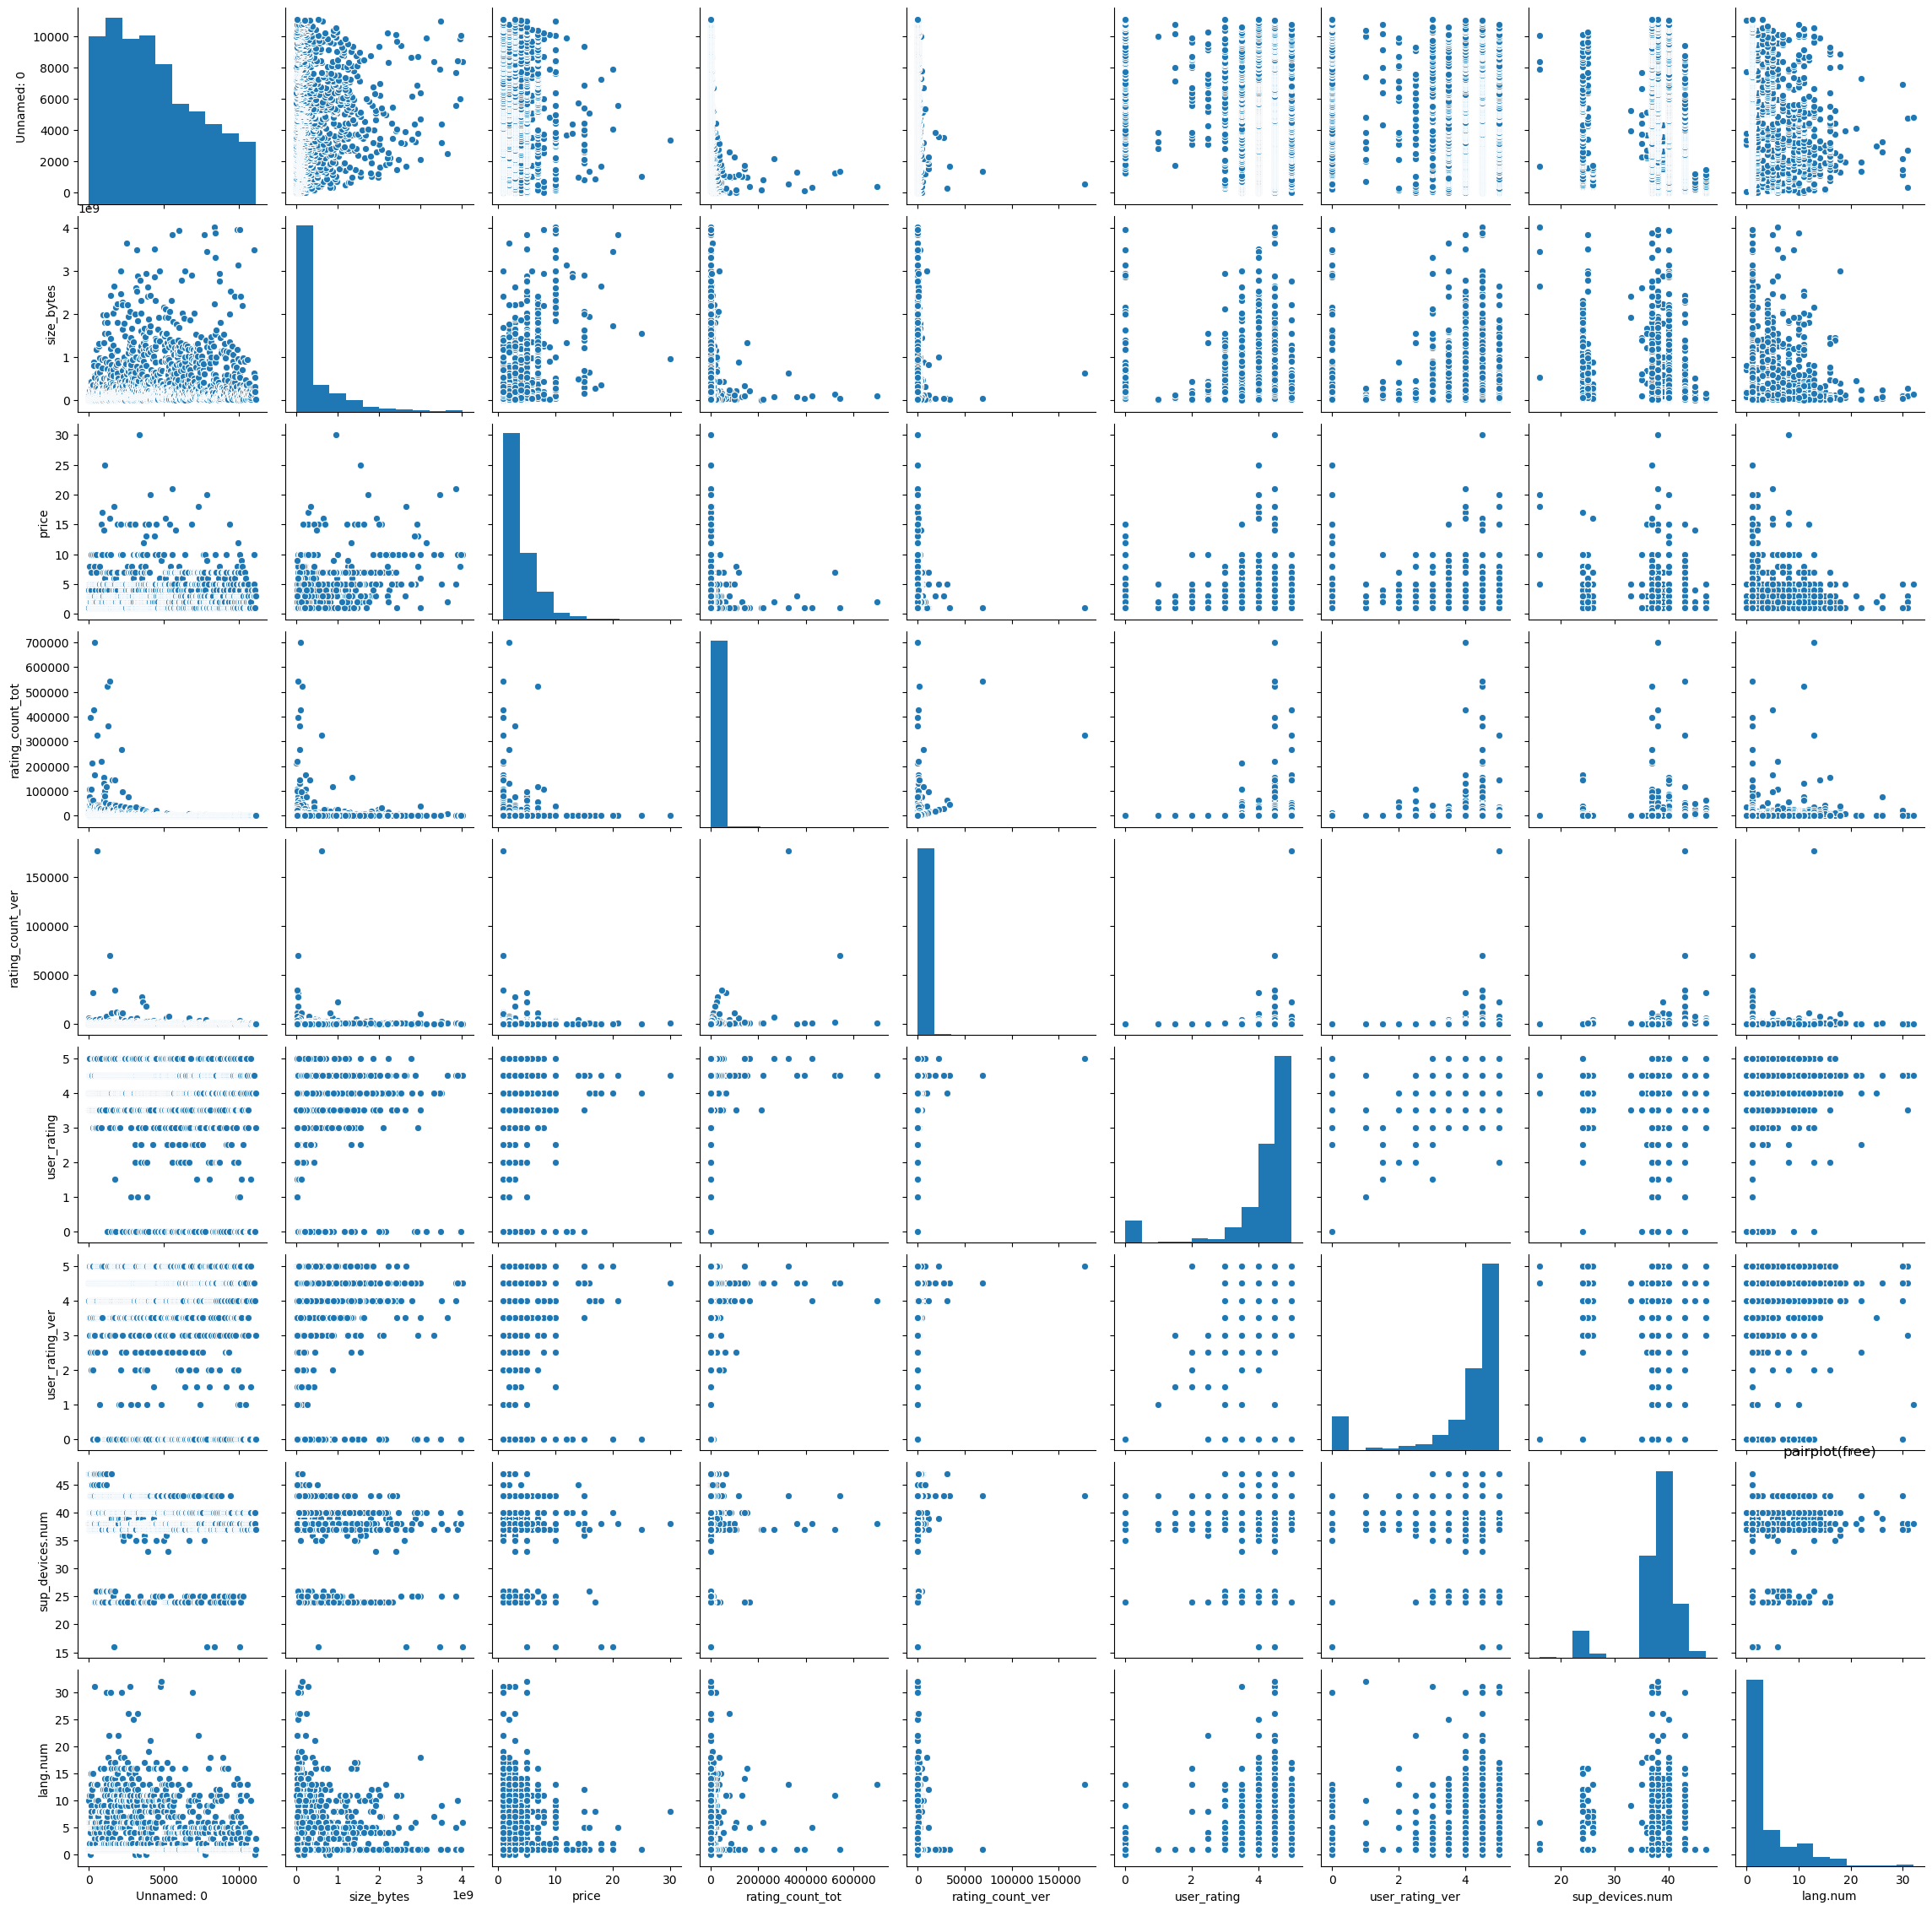

In [50]:
sns.pairplot(dfTmp[dfTmp['type']=='Payed'])
plt.show()

#### free

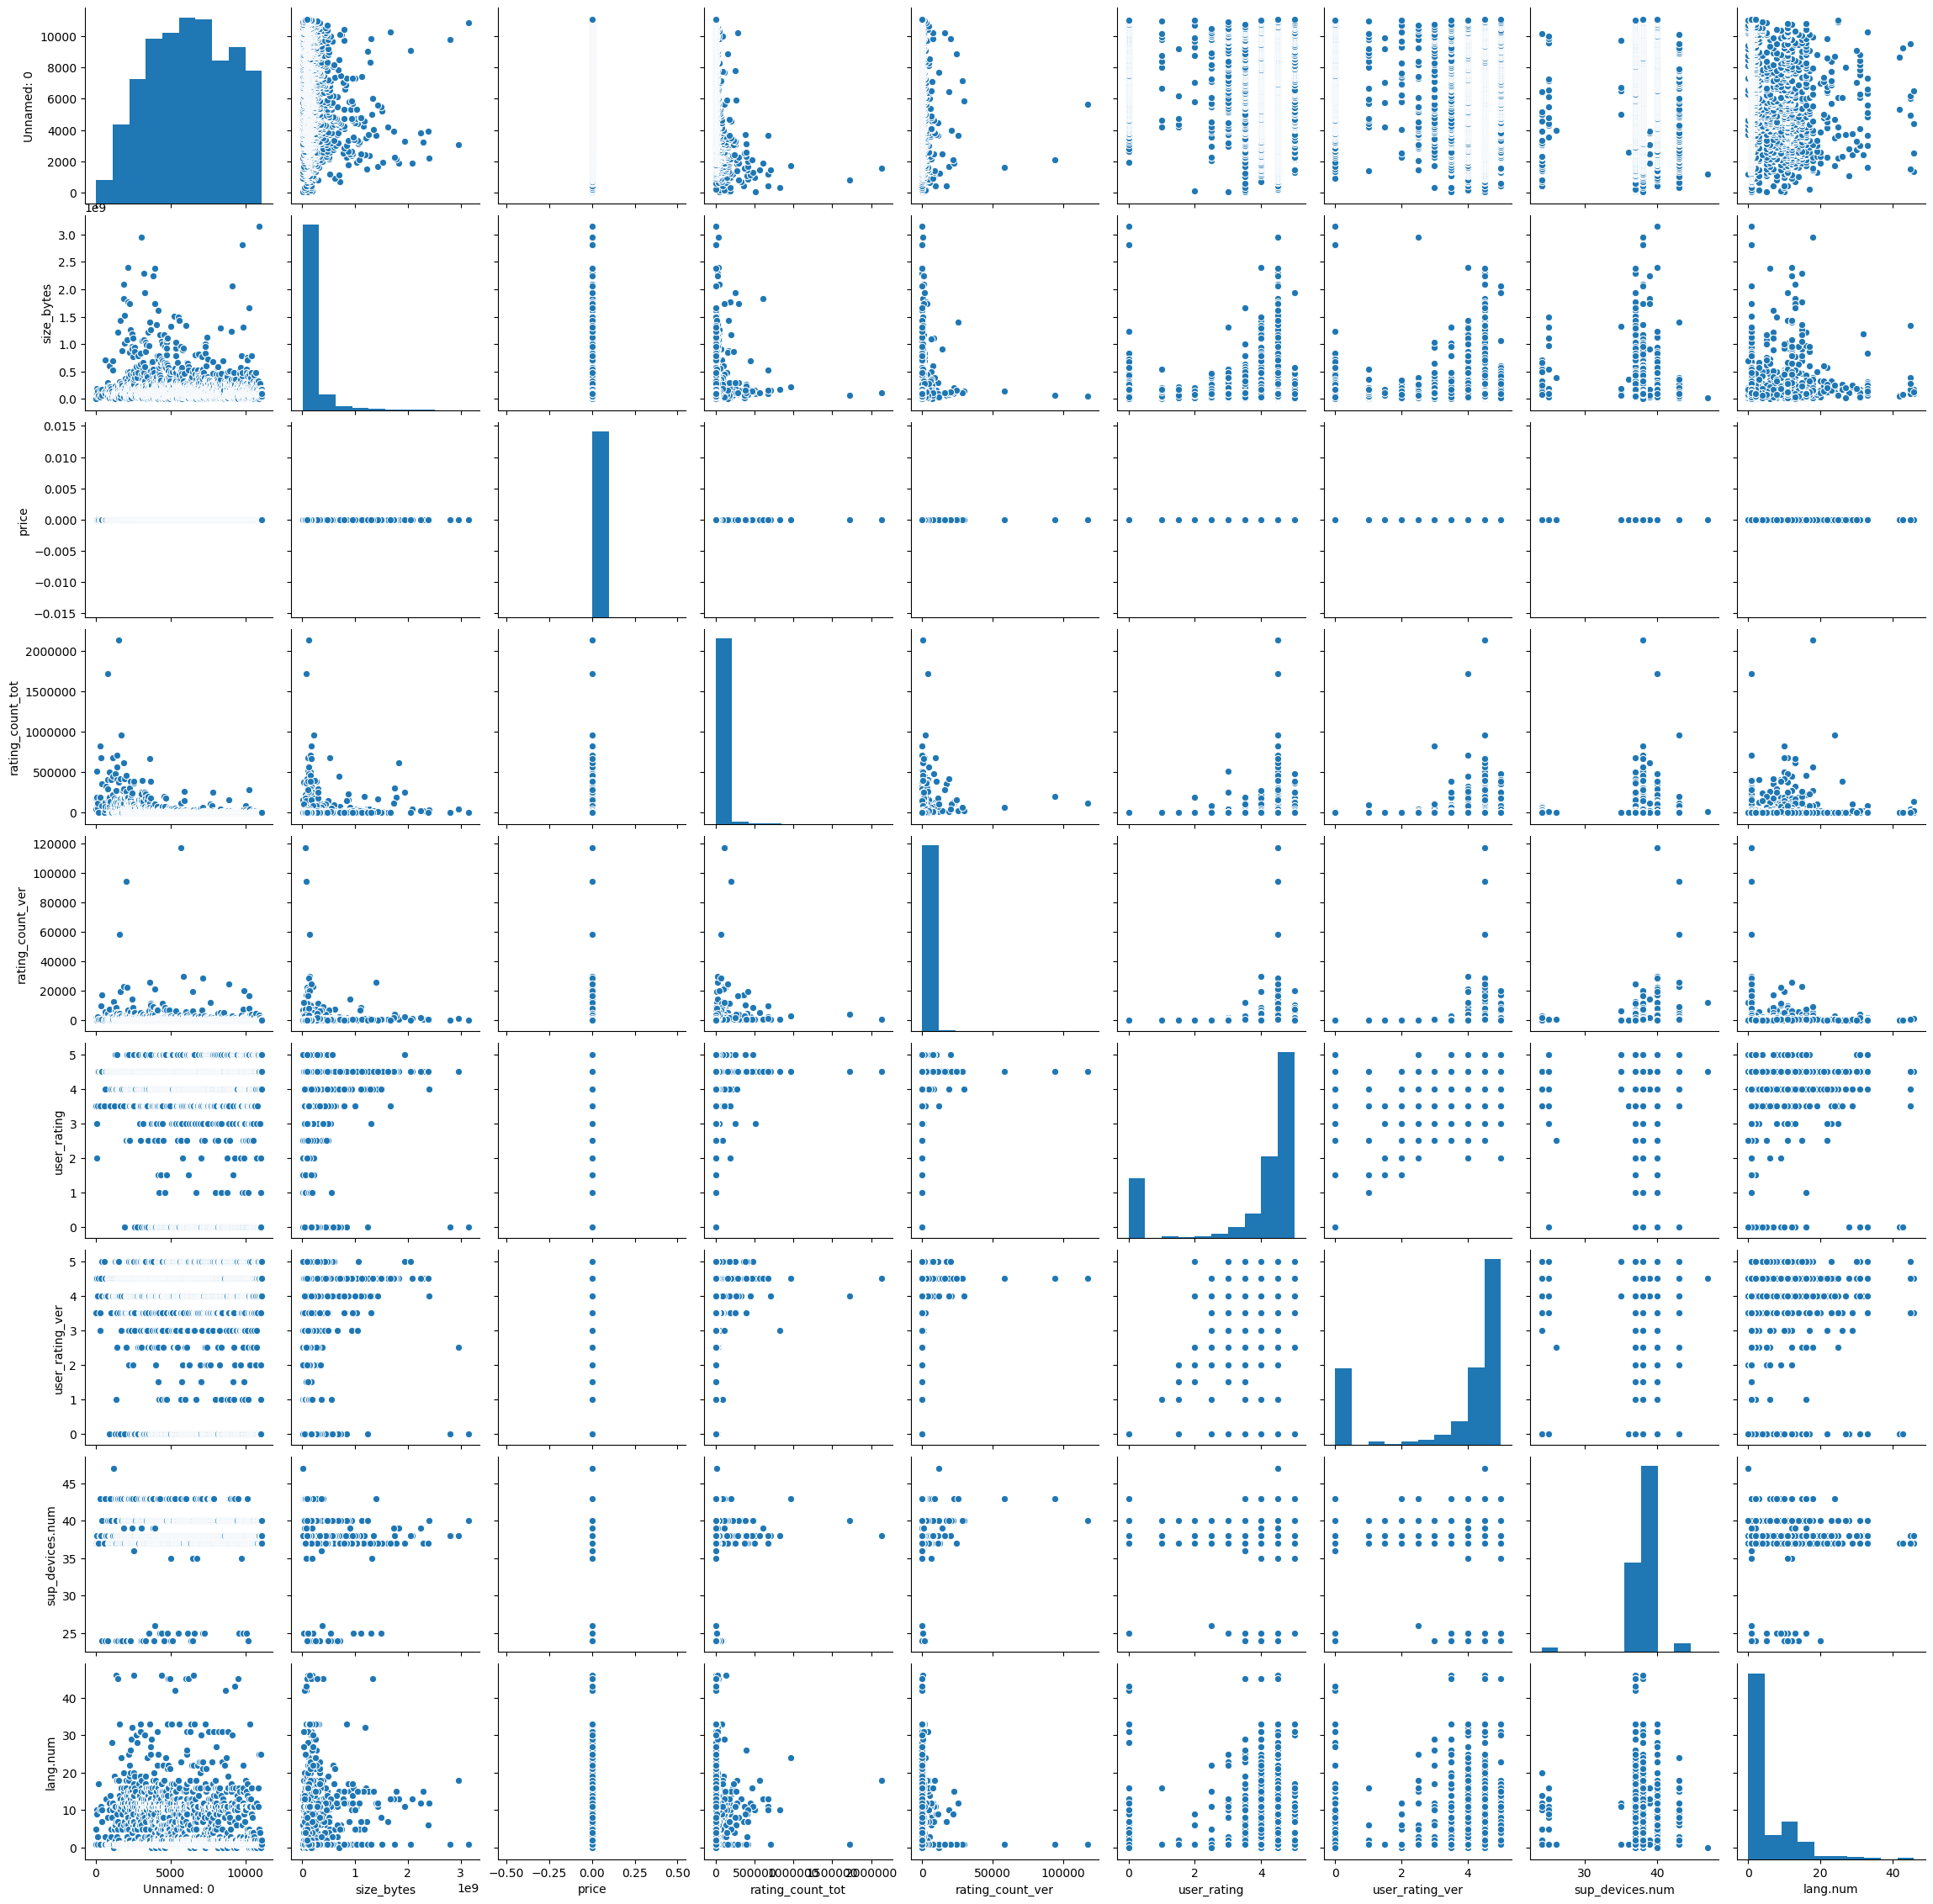

In [15]:
sns.pairplot(dfTmp[dfTmp['type']=='Free'])

plt.show()

### the user rating and the supperted devices

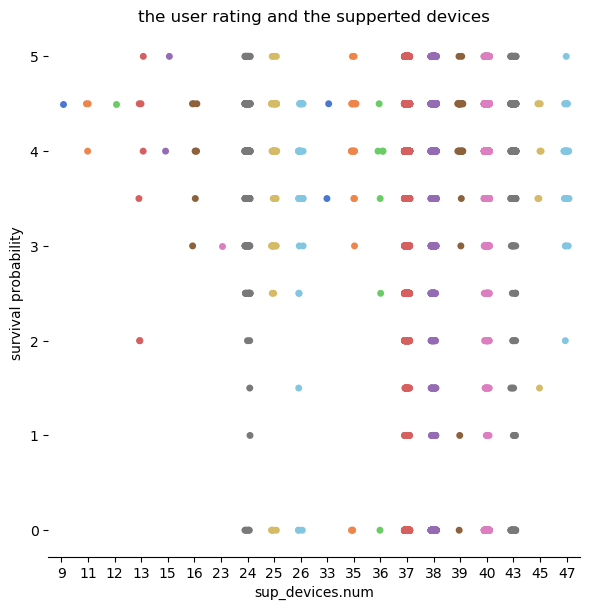

In [51]:
g = sns.catplot(x="sup_devices.num", y="user_rating",  data=df,
                height=6, kind="strip", palette="muted")
g.despine(left=True)
plt.title("the user rating and the supperted devices")
g.set_ylabels("survival probability")